### Treść zadania

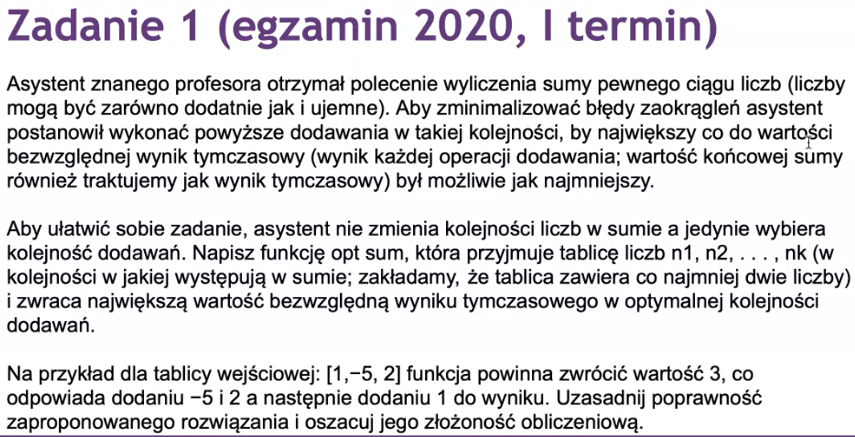

### Omówienie

Algorytm jest nieco zakręcony, ale najważniejszą częścią jest ten fragment:

    sum_ = abs(S[j] - S[i - 1])
    for k in range(i, j):
        F[i][j] = min(max(recur(i, k), recur(k + 1, j), sum_), F[i][j])

Nasuwa się pytanie, dlaczego akurat w taki sposób ułożony został warunek? Powód jest taki, że jako wynik tymczasowy traktujemy zarówno wynik operacji dodawania jak ich rezultat. W tym przypadku, dzięki utworzeniu tablicy $ S $, możemy w czasie $ O(1) $ otrzymać sumę dowolnego przedziału wartości z tablicy wejściowej $ A $. Naszym celem jest zminimalizowanie maksymalnej sumy tymczasowej, więc logiczne jest wywołanie funkcji $ min() $, a dopiero w niej $ max() $ (minimalizujemy maksimum -> używamy konstrukcji $ min(max(...)) $). Zauważmy, że tak naprawdę nie wiemy, gdzie należy podzielić dany zbiór wartości (wstawić nawiasy), więc testujemy wszystkie możliwe podziały na 2 podzbiory, które będziemy następnie rekurencyjne sumować (korzystamy z pętli i dzielimy bieżący podciąg wartości od indeksu $ i $ do $ j $ na podciągi $ i - k $ i $ k+1 - j $). Następnie musimy wybrać maksimum z tych dwóch podziałów oraz końcowej sumy i je zminimalizować, poprzez porównanie z poprzednim zapisanym maksimum, które było dotychczas minimalne.

### Złożoność

###### Obliczeniowa:
$ O(n^3) $
###### Pamięciowa:
$ O(n^2) $

### Implementacja

#### Top-down

In [1]:
def opt_sum(A: 'array of numbers to add'):
    n = len(A)
    INF = float('inf')
    F = [[INF] * n for _ in range(n)]
    
    S = [0] * (n + 1)
    S[0] = A[0]
    for i in range(1, n):
        S[i] = A[i] + S[i - 1]
    
    def recur(i, j):
        if i == j:
            F[i][j] = 0  # Store 0 as we do not add anything
        elif j - i == 1: 
            F[i][j] = abs(A[i] + A[j])
        elif F[i][j] == INF:
            sum_ = abs(S[j] - S[i - 1])
            for k in range(i, j):
                F[i][j] = min(max(recur(i, k), recur(k + 1, j), sum_), F[i][j])
                
        return F[i][j]
    
    recur(0, n - 1)
    print(*F, sep='\n')
    return F[0][n - 1]

###### Kilka testów

In [2]:
A = [1, -5, 2]

print(opt_sum(A))

[0, 4, 3]
[inf, inf, 3]
[inf, inf, 0]
3


In [3]:
A = [1, -5, 8, -6, 2, 3]

print(opt_sum(A))

[0, 4, 4, 3, 3, 3]
[inf, 0, 3, 3, 3, 3]
[inf, inf, 0, 2, 4, 7]
[inf, inf, inf, 0, 4, 4]
[inf, inf, inf, inf, 0, 5]
[inf, inf, inf, inf, inf, 0]
3


### (Dodatkowo) Odtwarzanie kolejności działań
##### (Nawiadowanie ciągu tak, aby spełnione były zakładane warunki)

In [4]:
def opt_sum(A: 'array of numbers to add'):
    n = len(A)
    INF = float('inf')
    F = [[INF] * n for _ in range(n)]
    R = [[-1] * n for _ in range(n)]
    
    S = [0] * (n + 1)
    S[0] = A[0]
    for i in range(1, n):
        S[i] = A[i] + S[i - 1]
    
    def recur(i, j):
        if i == j:
            F[i][j] = 0  # Store 0 as we do not add anything
        elif j - i == 1: 
            F[i][j] = abs(A[i] + A[j])
        elif F[i][j] == INF:
            sum_ = abs(S[j] - S[i - 1])
            for k in range(i, j):
                curr_sum = max(recur(i, k), recur(k + 1, j), sum_)
                if curr_sum < F[i][j]:
                    F[i][j] = curr_sum
                    R[i][j] = k
                    
        return F[i][j]
    
    recur(0, n - 1)
    
#     print(*F, sep='\n', end='\n\n')
#     print(*R, sep='\n')
    
    return F[0][n - 1], R


def get_solution(A: 'array of numbers to add', R: 'array of split indices'):
    n = len(A)
    k = R[0][n - 1]
    
    if k < 0: return tuple(A)
    
    def recur(i, j):
        if i == j: return A[i]
        if i + 1 == j: return (A[i], A[j])
        
        k = R[i][j]
        return (recur(i, k), recur(k + 1, j))
            
    return recur(0, n - 1)

###### Kilka testów

In [5]:
A = [1, -5, 2]

res, R = opt_sum(A)
print('Result:', res)
solution = get_solution(A, R)
print(str(solution).replace(',', ' +')[1:-1])

Result: 3
1 + (-5 + 2)


In [6]:
A = [1, -5, 8, -6, 2, 3]

res, R = opt_sum(A)
print('Result:', res)
solution = get_solution(A, R)
print(str(solution).replace(',', ' +')[1:-1])

Result: 3
1 + (((-5 + (8 + -6)) + 2) + 3)
